# Chapter 10. Introduction to Artificial Neural Networks with Keras

Project Goal: ANN(Artificial Neural Networks), MLPs(Multilayer Perceptrons)

# Perceptrons (感知器)

p. 277~287 有對於 perceptron 原理的完整介紹, 等厲害一點再回來看吧嗚嗚

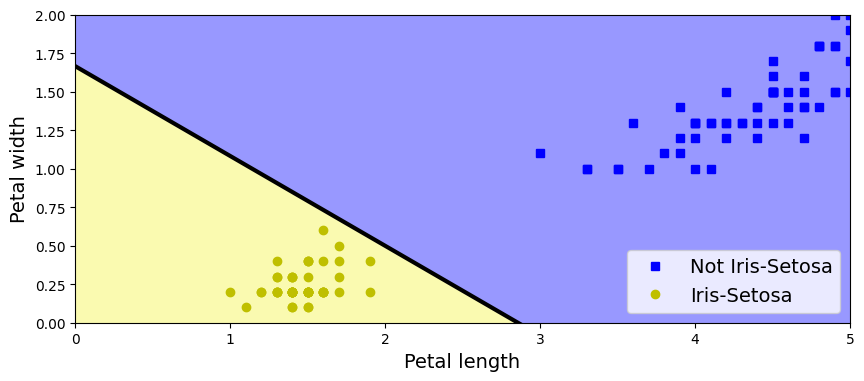

In [2]:
# 試試看以單一 perceptron 來辨別 iris 資料集
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int32)

per_clf = Perceptron()
per_clf.fit(X, y)

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# Activation Functions (觸發函數)

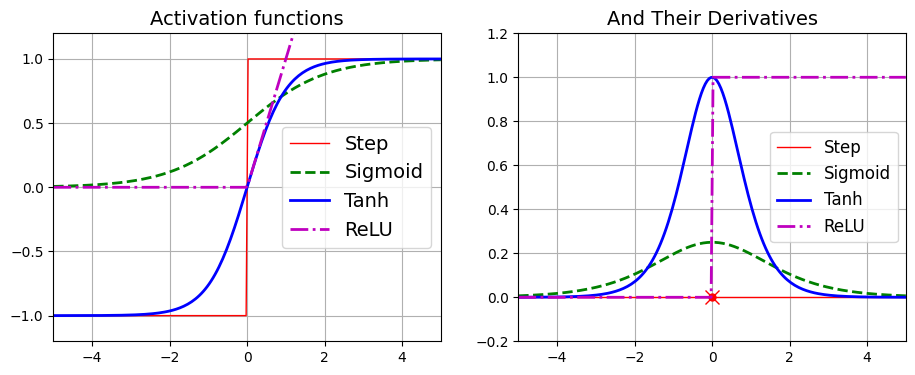

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=12)
plt.title("And Their Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

# 範例1. 圖像分類器

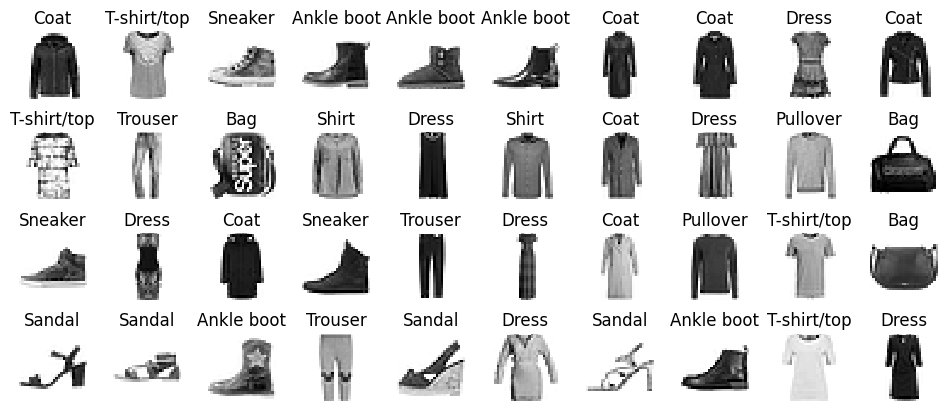

In [10]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
# X_train_full.shape = (60000, 28, 28), X_train_full.dtype = dtype('uint8')

# 取前5000張當 validation set, 其餘當 training data, 上面也有10000個 testing data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# 把 y_train 的數字對應成英文字
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 看看資料長怎樣
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. 建立神經網路模型

In [15]:
# Sequential 模型是一疊循序連接的階層, 稱為 Sequential API
# 第一層是 Flatten, 會將每一個輸入圖片轉成一維的陣列（也就是X.reshape(-1, 1)）
# 第二層是 Dense 隱藏層, 有300個神經元, 每一個Dense層都有自己的權重矩陣, 而每一個神經元都有自己的偏差向量
# 第三層一樣是 Dense 層, 有100個神經元
# 第四層一樣是 Dense 層, 有10個神經元（因為資料有10種類別）, 使用softmax觸發函數（因為資料是互斥的）

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.Dense(100, activation="relu"), 
    keras.layers.Dense(10, activation="softmax")
])

'''
也可以寫成：
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
'''

# 查看模型詳細內容
print(model.summary())
# Shape 裡面的 None 代表可以為任何 batch size
# 第一層Dense的參數 235500 = 784 * 300 + 300 (784 * 神經元 + 偏差項)

# 也可以查看單一層的詳細資訊
hidden1 = model.layers[1]
print("\nFirst hidden layer:", hidden1.name)
weights, biases = hidden1.get_weights()
print("Weights of layer 1:", weights[:5], " with shape =", weights.shape)
# 從輸出可以看出, 在模型開始訓練之前, dense層就已經隨機設定權重的初始值了
print("Biases :", biases[:5], " with shape =", biases.shape)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     


                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

First hidden layer: dense_12
Weights of layer 1: [[-2.3185272e-02 -1.4311079e-02  2.6578009e-02 ... -3.0192345e-02
  -1.8068559e-02  6.9167003e-02]
 [ 5.9072107e-02  2.6965372e-02 -5.8442805e-02 ...  4.4566996e-02
   5.7962164e-02  7.0980340e-02]
 [ 5.1774085e-02 -3.4927927e-02  1.1649936e-02 ...  6.3504741e-02
   5.2896544e-02  1.1272036e-02]
 [-2.4171516e-02 -6.7217901e-02 -6.7004777e-02 ...  5.8928058e-02
   5.9415281e-02 -6.7986548e-05]
 [-3.5296146e-02  6.8181068e-02 -5.1998504e-02 ...  6.6768229e-02
   1.8929750e-02 -5.3360857e-02]]  with shape = (784, 300)
Biases : [0. 0. 0. 0. 0.]  with shape = (300,)


2. 編譯(Compile)模型

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

# 為何用 sparse_categorical_crossentropy ?
# 因為標籤是稀疏的(每個實例只有一個目標類別索引), 而且類別互斥
# 如果每個實例都有個類別的目標機率(one-hot的[0, 0, 1, 0, 0, ...]), 就要改用 categorical_crossentropy
# 而如果要做二元分類, 輸出層就要用sigmoid觸發函數加上binary_crossentropy loss, 而不是用softmax

3. 訓練與評估模型

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7088 - accuracy: 0.7666 - val_loss: 0.5030 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4850 - accuracy: 0.8295 - val_loss: 0.4517 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4400 - accuracy: 0.8439 - val_loss: 0.4370 - val_accuracy: 0.8436
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4127 - accuracy: 0.8533 - val_loss: 0.3911 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3930 - accuracy: 0.8602 - val_loss: 0.3728 - val_accuracy: 0.8748
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3764 - accuracy: 0.8673 - val_loss: 0.3705 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3641 - accuracy: 0.8714 - val_loss: 0.3877 - val_accuracy:

In [21]:
# history 裡儲存了所有訓練過程的資料, 例如：
print("訓練參數:", history.params)
print("epoch:", history.epoch)
print("每個epoch的所有指標儲存在 history.history 裡")

訓練參數: {'verbose': 1, 'epochs': 30, 'steps': 1719}
epoch: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
每個epoch的所有指標儲存在 history.history 裡


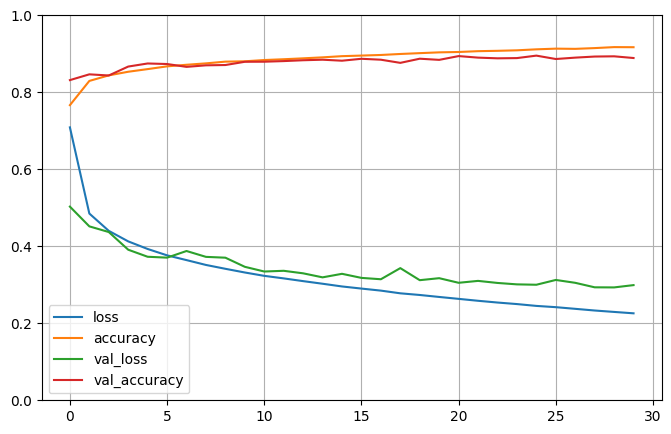

In [22]:
# 畫出學習曲線
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)     # 將座標範圍限制在[0~1]
plt.show()

# 由下圖可以看見, loss 及 val_loss 都仍在下降, 所以可以增加 epoch

In [23]:
# 以測試組來評估模型
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 831us/step - loss: 54.7795 - accuracy: 0.8633


[54.7795295715332, 0.8633000254631042]

4. 利用模型來預測

1/1 [==============================] - 0s 12ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 10ms/step
[9 2 1]


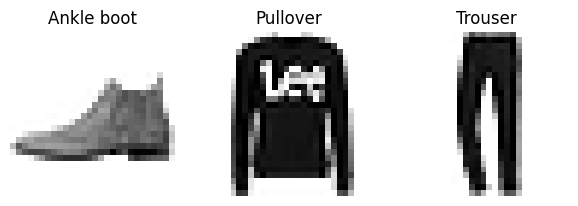

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))
# 這裡顯示的是各個類別的機率
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 範例2. 加州房產問題 (Sequential API 建立回歸 MLP)

為何 training data 用 fit_transform(), 而 testing data 用 transform() ?
* 先在 traing data 執行 fit(), 會計算出資料裡所有特徵的 mean 及 variance, 再執行 transform()
* 將來 testing data 執行 transform() 的時候就會根據先前執行 fit 得到的 mean 或 variance 等資料去做標準化等的transform

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

Epoch 1/20
363/363 [==============================] - 0s 620us/step - loss: 0.8449 - val_loss: 2.9344
Epoch 2/20
363/363 [==============================] - 0s 478us/step - loss: 0.5201 - val_loss: 5.7290
Epoch 3/20
363/363 [==============================] - 0s 626us/step - loss: 0.4936 - val_loss: 1.6309
Epoch 4/20
363/363 [==============================] - 0s 717us/step - loss: 0.4240 - val_loss: 0.4164
Epoch 5/20
363/363 [==============================] - 0s 704us/step - loss: 0.4068 - val_loss: 0.4208
Epoch 6/20
363/363 [==============================] - 0s 692us/step - loss: 0.3985 - val_loss: 0.4423
Epoch 7/20
363/363 [==============================] - 0s 479us/step - loss: 0.3998 - val_loss: 0.4190
Epoch 8/20
363/363 [==============================] - 0s 474us/step - loss: 0.3907 - val_loss: 0.4114
Epoch 9/20
363/363 [==============================] - 0s 475us/step - loss: 0.3848 - val_loss: 0.4138
Epoch 10/20
363/363 [==============================] - 0s 475us/step - loss: 0.382

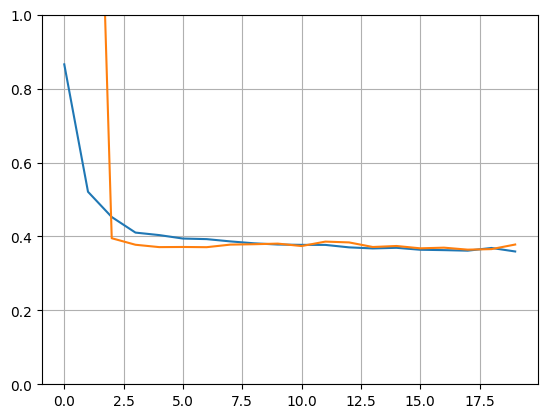

In [29]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Functional API 建立複雜的模型

1. Wide & Deep Neural Network:
* 模型結構會同時讓神經網路去學習深淺兩個路徑
* 模型架構如下：input -> hidden1 -> hidden2 -> concat -> output     (長/deep路徑)
*                  ↳------------------------↑          (短/wide路徑)

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

# 有兩個括號的, 代表第一個是宣告他, 第二個是呼叫他&給的參數
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_25 (Dense)            (None, 30)                   270       ['input_3[0][0]']             
                                                                                                  
 dense_26 (Dense)            (None, 30)                   930       ['dense_25[0][0]']            
                                                                                                  
 concatenate_2 (Concatenate  (None, 38)                   0         ['input_3[0][0]',             
 )                                                                   'dense_26[0][0]']      

In [35]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 656us/step - loss: 1.9613 - val_loss: 1.2938
Epoch 2/20
363/363 [==============================] - 0s 513us/step - loss: 0.7227 - val_loss: 0.7251
Epoch 3/20
363/363 [==============================] - 0s 520us/step - loss: 0.6509 - val_loss: 0.6084
Epoch 4/20
363/363 [==============================] - 0s 526us/step - loss: 0.6101 - val_loss: 0.5959
Epoch 5/20
363/363 [==============================] - 0s 510us/step - loss: 0.5801 - val_loss: 0.5922
Epoch 6/20
363/363 [==============================] - 0s 515us/step - loss: 0.5552 - val_loss: 0.5249
Epoch 7/20
363/363 [==============================] - 0s 687us/step - loss: 0.5358 - val_loss: 0.5019
Epoch 8/20
363/363 [==============================] - 0s 758us/step - loss: 0.5195 - val_loss: 0.5565
Epoch 9/20
363/363 [==============================] - 0s 762us/step - loss: 0.5036 - val_loss: 0.4711
Epoch 10/20
363/363 [==============================] - 0s 751us/step - loss: 0.490

2. 若想讓不同的子集分別通過長短路徑, 就需要兩組輸入
* 模型架構如下：input B -> hidden1 -> hidden2 -> concat -> output     (長/deep路徑)
*                 input A --------------------↑          (短/wide路徑)

In [37]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_30 (Dense)            (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_31 (Dense)            (None, 30)                   930       ['dense_30[0][0]']            
                                                                                            

In [38]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 666us/step - loss: 2.1155 - val_loss: 1.3522
Epoch 2/20
363/363 [==============================] - 0s 716us/step - loss: 0.7816 - val_loss: 0.6588
Epoch 3/20
363/363 [==============================] - 0s 884us/step - loss: 0.6380 - val_loss: 0.5997
Epoch 4/20
363/363 [==============================] - 0s 999us/step - loss: 0.5787 - val_loss: 0.5214
Epoch 5/20
363/363 [==============================] - 0s 874us/step - loss: 0.5405 - val_loss: 0.4891
Epoch 6/20
363/363 [==============================] - 0s 851us/step - loss: 0.5152 - val_loss: 0.4766
Epoch 7/20
363/363 [==============================] - 0s 621us/step - loss: 0.4971 - val_loss: 0.4572
Epoch 8/20
363/363 [==============================] - 0s 541us/step - loss: 0.4832 - val_loss: 0.4407
Epoch 9/20
363/363 [==============================] - 0s 545us/step - loss: 0.4714 - val_loss: 0.4301
Epoch 10/20
363/363 [==============================] - 0s 544us/step - loss: 0.462

1/1 [==============================] - 0s 26ms/step


3. 加入額外的輸出, 例如：
*                                   ↱------------> 輔助output
* 模型架構如下：input B -> hidden1 -> hidden2 -> concat -> output
*                 input A --------------------↑   

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 1s 842us/step - loss: 2.5803 - main_output_loss: 2.4008 - aux_output_loss: 4.1956 - val_loss: 2.5084 - val_main_output_loss: 2.3791 - val_aux_output_loss: 3.6717
Epoch 2/20
363/363 [==============================] - 0s 705us/step - loss: 1.0576 - main_output_loss: 0.8947 - aux_output_loss: 2.5241 - val_loss: 1.0887 - val_main_output_loss: 0.8340 - val_aux_output_loss: 3.3805
Epoch 3/20
363/363 [==============================] - 0s 948us/step - loss: 0.8232 - main_output_loss: 0.7052 - aux_output_loss: 1.8855 - val_loss: 0.9126 - val_main_output_loss: 0.6379 - val_aux_output_loss: 3.3851
Epoch 4/20
363/363 [==============================] - 0s 864us/step - loss: 0.7298 - main_output_loss: 0.6311 - aux_output_loss: 1.6178 - val_loss: 0.8526 - val_main_output_loss: 0.5827 - val_aux_output_loss: 3.2812
Epoch 5/20
363/363 [==============================] - 0s 601us/step - loss: 0.6749 - main_output_loss: 0.5852 - aux_output_loss: 1.4826 

1/1 [==============================] - 0s 29ms/step


# 範例3. Subclassing API 建立動態模型

上述的範例中, 模型的架構都是事先就固定好的(靜態), 我們可以換一種方法：

可以先建立好我們會用到的階層, 等到要使用時再拿來組裝, 這樣更有彈性(動態)

In [41]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)      # 處理標準引數, 例如名稱
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation="relu")

In [42]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 824us/step - loss: 2.3757 - output_1_loss: 2.1628 - output_2_loss: 4.2921 - val_loss: 1.0896 - val_output_1_loss: 0.8722 - val_output_2_loss: 3.0455
Epoch 2/10
363/363 [==============================] - 0s 609us/step - loss: 0.9379 - output_1_loss: 0.7551 - output_2_loss: 2.5827 - val_loss: 0.8590 - val_output_1_loss: 0.7098 - val_output_2_loss: 2.2020
Epoch 3/10
363/363 [==============================] - 0s 621us/step - loss: 0.7703 - output_1_loss: 0.6425 - output_2_loss: 1.9205 - val_loss: 0.7673 - val_output_1_loss: 0.6366 - val_output_2_loss: 1.9435
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6926 - output_1_loss: 0.5915 - output_2_loss: 1.6022 - val_loss: 0.6687 - val_output_1_loss: 0.5471 - val_output_2_loss: 1.7633
Epoch 5/10
363/363 [==============================] - 0s 653us/step - loss: 0.6442 - output_1_loss: 0.5580 - output_2_loss: 1.4195 - val_loss: 0.6169 - val_output_1_loss: 0.5111 

# 儲存 / 讀取模型

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"), 
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

# 當我們需要儲存model時, 呼叫下面這行
model.save("my_keras_model.h5")
# 也可以儲存weights的資訊
model.save_weights("my_keras_weights.ckpt")

# 當我們需要reload時, 呼叫下面這行
model = keras.models.load_model("my_keras_model.h5")
model.load_weights("my_keras_weights.ckpt")

model.predict(X_new)

Epoch 1/10
363/363 [==============================] - 0s 654us/step - loss: 1.9429 - val_loss: 1.0798
Epoch 2/10
363/363 [==============================] - 0s 515us/step - loss: 0.8018 - val_loss: 0.7417
Epoch 3/10
363/363 [==============================] - 0s 517us/step - loss: 0.7222 - val_loss: 0.7319
Epoch 4/10
363/363 [==============================] - 0s 504us/step - loss: 0.6716 - val_loss: 0.6386
Epoch 5/10
363/363 [==============================] - 0s 512us/step - loss: 0.6320 - val_loss: 0.5761
Epoch 6/10
363/363 [==============================] - 0s 510us/step - loss: 0.5968 - val_loss: 0.5643
Epoch 7/10
363/363 [==============================] - 0s 510us/step - loss: 0.5686 - val_loss: 0.5487
Epoch 8/10
363/363 [==============================] - 0s 498us/step - loss: 0.5440 - val_loss: 0.4998
Epoch 9/10
363/363 [==============================] - 0s 501us/step - loss: 0.5206 - val_loss: 0.4795
Epoch 10/10
162/162 [==============================] - 0s 518us/step - loss: 0.478

/Users/chenyanting/Desktop/Machine Learning Study/my_env/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 30ms/step


array([[0.55139613],
       [1.5363146 ],
       [2.9732008 ]], dtype=float32)

# Callback

執行大型訓練時, 應該在訓練途中定期儲存checkpoint

In [46]:
keras.backend.clear_session()       # 清空前一個tf, 創立一個新的
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"), 
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# ModelCheckpoint() 會定期儲存 checkpoint, 預設是每個 epoch 都會儲存
# save_best_only=True, 代表只會儲存目前處理validation set最佳的那個模型
# 就不需擔心訓練時間太長, 或是overfitting發生了
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
# 等 fit() 都結束後, 再 reload 最好的那個 model 就好
model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 668us/step - loss: 1.9673 - val_loss: 1.9266
Epoch 2/10
363/363 [==============================] - 0s 519us/step - loss: 0.8804 - val_loss: 0.7966
Epoch 3/10
  1/363 [..............................] - ETA: 0s - loss: 0.6301

/Users/chenyanting/Desktop/Machine Learning Study/my_env/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 0s 639us/step - loss: 0.7562 - val_loss: 0.7542
Epoch 4/10
363/363 [==============================] - 0s 514us/step - loss: 0.6958 - val_loss: 0.6509
Epoch 5/10
363/363 [==============================] - 0s 514us/step - loss: 0.6523 - val_loss: 0.6078
Epoch 6/10
363/363 [==============================] - 0s 504us/step - loss: 0.6161 - val_loss: 0.6345
Epoch 7/10
363/363 [==============================] - 0s 505us/step - loss: 0.5861 - val_loss: 0.7175
Epoch 8/10
363/363 [==============================] - 0s 512us/step - loss: 0.5617 - val_loss: 0.5661
Epoch 9/10
363/363 [==============================] - 0s 645us/step - loss: 0.5358 - val_loss: 0.6175
Epoch 10/10
363/363 [==============================] - 0s 745us/step - loss: 0.5145 - val_loss: 0.6254


162/162 [==============================] - 0s 511us/step - loss: 0.5319


In [48]:
# 再加上 early stopping 會更快
# patience=10, 代表如果連續10個epoch都沒有進步, 那就提前停止
# 而我們也不需要儲存最佳模型, 因為EarlyStopping本來就會追蹤最好的模型了
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 641us/step - loss: 0.3924 - val_loss: 0.4058
Epoch 2/100
363/363 [==============================] - 0s 516us/step - loss: 0.3893 - val_loss: 0.3797
Epoch 3/100
363/363 [==============================] - 0s 520us/step - loss: 0.3876 - val_loss: 0.3715
Epoch 4/100
363/363 [==============================] - 0s 705us/step - loss: 0.3850 - val_loss: 0.4215
Epoch 5/100
363/363 [==============================] - 0s 773us/step - loss: 0.3827 - val_loss: 0.3871
Epoch 6/100
363/363 [==============================] - 0s 824us/step - loss: 0.3804 - val_loss: 0.3567
Epoch 7/100
363/363 [==============================] - 0s 777us/step - loss: 0.3797 - val_loss: 0.4821
Epoch 8/100
363/363 [==============================] - 0s 770us/step - loss: 0.3774 - val_loss: 0.3626
Epoch 9/100
363/363 [==============================] - 0s 599us/step - loss: 0.3756 - val_loss: 0.3862
Epoch 10/100
363/363 [==============================] - 0s 534us/step - l

In [49]:
# 如果想要比較 training 跟 validation 的 loss (檢測overfitting), 可以這樣寫：
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

234/363 [==================>...........] - ETA: 0s - loss: 0.3631
val/train: 0.98
363/363 [==============================] - 0s 996us/step - loss: 0.3614 - val_loss: 0.3527


# TensorBoard

tensorboard 是可以把訓練成果視覺化的工具, 他會把視覺化資料輸出至一個log檔(event file, 事件檔), 每筆資料都是binary的摘要(summary)

1. 訓練時順便建立log目錄, 將摘要都寫進事件檔

In [51]:
import os
# 要讓 TensorBoard 伺服器指向一個log根目錄, 在每次執行時將資料寫在不同的子目錄
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    # 以時間作為子目錄的名稱
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 962us/step - loss: 2.0903 - val_loss: 1.0817
Epoch 2/30
363/363 [==============================] - 0s 894us/step - loss: 0.8201 - val_loss: 0.6871
Epoch 3/30
363/363 [==============================] - 0s 725us/step - loss: 0.6288 - val_loss: 0.5700
Epoch 4/30
363/363 [==============================] - 0s 530us/step - loss: 0.5650 - val_loss: 0.5239
Epoch 5/30
363/363 [==============================] - 0s 528us/step - loss: 0.5307 - val_loss: 0.4911
Epoch 6/30
363/363 [==============================] - 0s 534us/step - loss: 0.5053 - val_loss: 0.4723
Epoch 7/30
363/363 [==============================] - 0s 528us/step - loss: 0.4865 - val_loss: 0.4508
Epoch 8/30
363/363 [==============================] - 0s 599us/step - loss: 0.4708 - val_loss: 0.4403
Epoch 9/30
363/363 [==============================] - 0s 529us/step - loss: 0.4578 - val_loss: 0.4318
Epoch 10/30
363/363 [==============================] - 0s 530us/step - loss: 0.446

2. 連線到 TensorBoard server

In [53]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 36936), started 0:03:20 ago. (Use '!kill 36936' to kill it.)

In [55]:
# 關閉 server
!kill 36936

還有很多操作, 詳細可見p. 311

# 神經網路 Hyperparameter 調整

In [ ]:
# 一樣藉由 GridSearchCV, RandomizedSearchCV 來搜尋最佳參數組合
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import scikeras
from scikeras.wrappers import KerasRegressor
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model
keras_reg = KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

print("Best Parameters:", rnd_search_cv.best_params_)
print("Best Score", rnd_search_cv.best_score_)
print("Best Estimator:", rnd_search_cv.best_estimator_)
print("Score on testing data:", rnd_search_cv.score(X_test, y_test))

關於 Hidden Layer 的數量
* 通常來說, 深層網路的效率比淺層但多神經元者還要好
* 很多時候我們會利用其他已經訓練好的隱藏層來當新的模型之低層, 稱為遷移學習(transfer learning)

關於每一層的neuron數
* 大部分時候會讓每層所有隱藏層擁有一樣數量的神經元, 但有時候讓第一層數量多於其他層會更好, 這取決於資料組